<a href="https://colab.research.google.com/github/Pengyu-gis/MyDeepLearing/blob/main/ViT_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers

In [2]:
from transformers import ViTImageProcessor, ViTForImageClassification
from PIL import Image
import requests

In [3]:
url = 'https://hips.hearstapps.com/hmg-prod/images/lonely-pug-royalty-free-image-1652974264.jpg?crop=0.447xw:1.00xh;0.355xw,0&resize=980:*'
image = Image.open(requests.get(url, stream=True).raw)

processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits

In [4]:
# model predicts one of the 1000 ImageNet classes
predicted_class_idx = logits.argmax(-1).item()
print("Predicted class:", model.config.id2label[predicted_class_idx])

Predicted class: pug, pug-dog


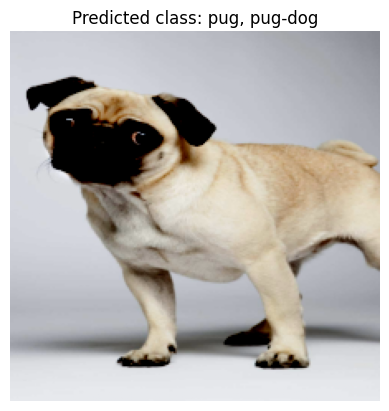

In [5]:
import matplotlib.pyplot as plt

# Convert the PyTorch tensor image to a NumPy array and transpose the dimensions
image = inputs.pixel_values[0].permute(1, 2, 0).numpy()

# Get the predicted class label
predicted_class = model.config.id2label[predicted_class_idx]

# Plot the image and the predicted class label as the title
plt.imshow(image)
plt.title(f"Predicted class: {predicted_class}")
plt.axis("off")
plt.show()